In [19]:
#%matplotlib inline
# 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
import matplotlib_inline
import matplotlib.pyplot as plt
import IPython.display
import random
import torch

w = [2, -3.4]^T ,b = 4.2

In [20]:
def synthetic_data(w, b, num_example):
    """生成 y = Xw + b + 噪声。"""
    X = torch.normal(0, 1, (num_example, len(w)))  # 生成均值为0，标准差为1的随机数，行数为样本数，列数为w的长度
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)  # 随机噪声
    return X, y.reshape((-1, 1))  # 将y返回成列向量

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [51]:
print('features:', features[0], '\nlabels:', labels[0])

features: tensor([1.1886, 0.4908]) 
labels: tensor([4.9022])


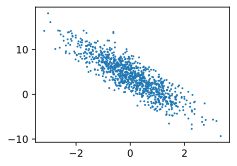

In [55]:
#IPython.display.set_matplotlib_formats('svg')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)  # scatter散点图

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)